# <span style="color:Green"><div align="center">Electrical circuits</div></span>


### <span style="color:orange">What is electrical circuit ?

An **electrical circuit** is a path in which electrons from a voltage or current source flow.

The point where those electrons enter an electrical circuit is called the "source" of electrons. The point where the electrons leave an electrical circuit is called the "return" or "earth ground". The exit point is called the "return" because electrons always end up at the source when they complete the path of an electrical circuit.

Electronic circuits usually use direct current sources. The load of an electronic circuit may be as simple as a few resistors, capacitors, and a lamp, all connected together to create the flash in a camera. Or an electronic circuit can be complicated, connecting thousands of resistors, capacitors, and transistors. It may be an integrated circuit such as the microprocessor in a computer.

Resistors and other circuit elements can be connected in series or in parallel.

# This photo shows some components of Circuits. 

![Electrical-circuits](http://www.funscience.in/images/StudyZone/Physics/ChemicalEffectsOfCurrent/ElectricalSymbols.png)

# Electrical Circuit Problem

The following scheme demonstrates a given electrical circuit. The provided task was to determine an electric current matrix X, which makes the next system of linear equations true.

In this particular task, we will assume that the current flows *clockwise*. Hence, the presented circuit can be represented as series of linear equations in a following way:



\begin{bmatrix} 
   -V_1 & {}+{} &  R_1i_1 & {}+{} & R_2(i_1 - i_2) & {}={} & 0 \\
    R_2(i_2-i_1) & {}+{} &  R_3i_2 & {}+{} &  R_4(i_2-i_3) & {}={} &  0 \\
    R_4(i_3-i_2) & {}+{} & R_5i_3 & {}+{} & V_2 & {}={} & 0
\end{bmatrix}

However, before working with these equations we have to rearrange and simplify them.


\begin{bmatrix} 
    R_1i_1  +  R_2i_1  -  R_2i_2  =  V_1 \\
    R_2i_2  -  R_2i_1  + R_3i_2  +  R_4i_2  - R_4i_3  =  0 \\
    R_4i_3  -  R_4i_2  + R_5i_3  =  -V_2
\end{bmatrix}

Finally, after some more transformations we obtain:


\begin{bmatrix} 
    i_1(R_1 + R_2) & - & i_2R_2 & + & 0i_3 & = & V_1 \\
    -i_1R_2 & + & i_2(R_2 + R_3+ R_4) & - & i_3R_4 & = & 0 \\
    0i_1 & - & i_2R_4 & + & i3(R_4 + R_5) & = & -V_2
\end{bmatrix}


Thus, for our calculation purposes we obtain:


\begin{align}
A &= \begin{bmatrix}
R_1 + R_2 & -R_2 & 0 \\
-R_2 & R_2+R_3+R_4 & -R_4 \\
0 & -R_4 & R_4+R_5
\end{bmatrix}
&
B &= \begin{bmatrix}
V_1 \\
0 \\
-V_2
\end{bmatrix}
&
X &= \begin{bmatrix}
i_1 \\
i_2 \\
i_3
\end{bmatrix}
\end{align}

In order to solve this problem, we will further represent this system of linear equations as the matrix multiplication equation:

$$ AX = B $$

where
A = matrix of resistors,
B = matrix of voltage.

In order to find the unknown matrix X, we will make an inverted matrix multiplication:

$$ X = A^{-1}B $$

In [1]:
import sympy as sp
import numpy as np

In [2]:
#Since there are no provided values in the task at hand, we will get them from user

def get_resistors_matrix(): #define a function for creating a matrix of resistors
    resistors = []
    for i in range(6):
        resistors.append(input('Enter a value for R{0} '.format(i+1)).strip())
    resistors = [float(i) for i in resistors]
    
    #Put resistance values according from our equations
    matrix = sp.Matrix([[resistors[0]+resistors[1], resistors[1]*(-1), 0],
                        [resistors[1]*(-1), resistors[1]+resistors[2]+resistors[3], resistors[3]*(-1)],
                        [0, resistors[3]*(-1), resistors[3]+resistors[4]]])        
    return matrix

def get_voltage_matrix(): #define a function for creating a matrix of voltage
    voltage = []
    for i in range(2):
        voltage.append(input('Enter a value for V{0} '.format(i+1)).strip())
    voltage = [float(i) for i in voltage]
    matrix = sp.Matrix([voltage[0], 0, voltage[1]*(-1)])   #voltage values from our equations 
    return matrix

In [4]:
#Receive values for resistors from user
A = get_resistors_matrix()
A

Enter a value for R1 12
Enter a value for R2 53
Enter a value for R3 23
Enter a value for R4 15
Enter a value for R5 53
Enter a value for R6 23


Matrix([
[ 65.0, -53.0,     0],
[-53.0,  91.0, -15.0],
[    0, -15.0,  68.0]])

In [5]:
#Receive values for voltage from user
B = get_voltage_matrix()
B

Enter a value for V1 12
Enter a value for V2 13


Matrix([
[ 12.0],
[    0],
[-13.0]])

In [11]:
#Solution matrix 
X = A.inv() * B
X

Matrix([
[ 0.311425708225025],
[ 0.155522094992955],
[-0.156870126104495]])

In [13]:
A.inv()

Matrix([
[ 0.0303332434645926, 0.0183332231169531, 0.00404409333462202],
[ 0.0183332231169531, 0.0224841415585274,  0.0049597371084987],
[0.00404409333462202, 0.0049597371084987,  0.0157999420092277]])

In order to verify that our solution is correct, we will perform following multiplication again:

$$ AX = B $$

If our calculations are indeed correct, we should recieve a matrix equal to the one provided in the given system of equations. 

In [9]:
A*X

Matrix([
[                12.0],
[2.66453525910038e-15],
[               -13.0]])

In [7]:
Current = np.linalg.solve(A,B)
print("Current:\n", Current)

TypeError: No loop matching the specified signature and casting
was found for ufunc solve

As can be seen in recieved answer, our calculations are correct.

# Finding the current flows through the resistors

In order to find the current flows through each resistor, we will assume the following current flows:

![currents-cycles](../e-circuit-cut-currents-cycles.png)

From our previous calculations we can tell that $I_a = 0.75 A$, $I_b = 0 A$, $I_c = -0.75 A$.

According to the Kirchhoff's current law, the current flowing into a node (or a junction) must be equal to current flowing out of it. Thus, we can substitute our currents and find the rest.

We can express the currents such as: $I_a = i_1$, $I_b = i_2$, $I_c = i_4$.

$$i_1 = i_2 + i_3$$
$$i_2 = i_1 - i_3$$
$$i_3 = -i_1 - i_2$$
$$i_4 = i_2 - i_5$$
$$i_5 = i_4 + i_2$$


After substitution and calculation, we get

\begin{matrix}
i_1 &=& 0.75 \\
i_2 &=& 0 \\
i_3 &=& -0.75 \\
i_4 &=& -0.75 \\
i_5 &=& 0.75
\end{matrix}

# Graph representation of electrical circuit

The given electronic circuit can be represented as a following graph:

In [15]:
%matplotlib inline
#import matplotlib.pyplot as plt
import networkx as nx

C:\Users\jayaj\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\jayaj\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


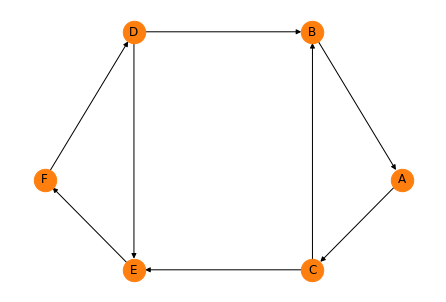

In [16]:
G2 = nx.DiGraph()
nodes = ['A','B','C','D','E','F']

G2.add_nodes_from(nodes)
G2.add_edges_from([('B','A'), ('A','C'),('C','B'),('D','E'),('D','B'),('C','E'),('E','F'),('F','D')])
nx.draw_spectral(G2, node_color='C1', node_size=500, with_labels=True);

# Sources

Diytechpro.com. (2017). Electric Circuit Simple Concept – DIY Tech Pro. [online] DIY Tech Pro. Available at: https://diytechpro.com/electric-circuit-simple-concept/ [Accessed 1 Jan. 2020].

Allaboutcircuits.com. (2015). What Are Electric Circuits? | Basic Concepts Of Electricity | Electronics Textbook. [online] Available at: https://www.allaboutcircuits.com/textbook/direct-current/chpt-1/electric-circuits/ [Accessed 3 Jan. 2020].


Prepared by: Alexandr Shevchenko